#  Chapter 6 - Decision Trees

## Setup

In [1]:
#Python needs to be > 3.5
import sys
assert sys.version_info >= (3,5)

#Scikit-Learn >= 0.20 
import sklearn
assert sklearn.__version__ >= "0.20"

#Common imports
import numpy as np
import os

#to make this notebook's output stable across runs
np.random.seed(42)

#To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extensions, dpi=resolution)

## Training and Visualizing a Decision Tree

In [2]:
#We will be using the Iris dataset from the previous chapters

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2:]# petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)


DecisionTreeClassifier(max_depth=2)

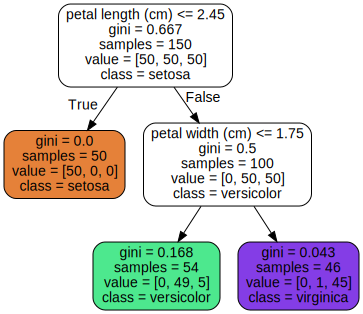

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## Estimating Class Probabilities

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

## Excercises Solutions

### 7.

In [3]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2,100)),'min_samples_split':[2,3,4]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=2, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_s

[CV] END .............max_leaf_nodes=15, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=15, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=15, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=15, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=15, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=15, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=16, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=16, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=16, min_samples_split=3; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=30, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=30, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=30, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=41, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=41, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=42, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=54, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=54, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=54, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=54, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=55, min_samples_split=4; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=66, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=66, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=67, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=68, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=78, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=78, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=79, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=80, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

[CV] END .............max_leaf_nodes=90, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=3; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=91, min_samples_split=4; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=2; total time=   0.0s
[CV] END .............max_leaf_nodes=92, min_samples_split=2; total time=   0.0s
[CV] END .............max_le

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [8]:
grid_search_cv.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

In [ ]:
grid_search_cv.fit(X_train, y_train)